# **Data Science Engineering Methods**
### **Assignment 3 – Model Interpretability**

# **Abstract**

This assignment aimed to interpret and understand the predictive models developed for a dataset related to mental health in the tech workplace. Three distinct models were employed: a linear regression model, a Random Forest classifier, and an XGBClassifier model identified through an automated machine learning (AutoML) process. The interpretability of these models was examined through their intrinsic properties—regression coefficients and feature importances—and extended via SHapley Additive exPlanations (SHAP) analysis. The SHAP values provided insight into the contribution of individual features to the prediction outcomes, allowing for a comparison of feature importance across the different model architectures. The assignment's findings highlight the nuances of model interpretability and the value of employing multiple approaches to gain comprehensive insights into model behavior.

***Mental health in Tech***  
*The selected dataset for this data science project centers around the topic of mental health within the technology industry. It includes a wide-ranging assortment of de-identified data concerning mental health issues, their occurrence, and the factors linked to them within the tech sector. This dataset serves as a valuable asset for conducting thorough examinations and extracting knowledge to enhance mental health assistance and overall well-being in the technology workplace.*

**Interpret your models:**

1. Fit a linear model and interpret the regression coefficients

2. Fit a tree-based model and interpret the nodes

3.  Use auto ml to find the best model

4. Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading the train dataset
train_data = pd.read_csv("https://raw.githubusercontent.com/Riya-Rajesh-Patil/DataScience/main/new_train_dataset.csv")
train_data.describe()


,Age
count,1007.000000
mean,32.298908
std,7.399763
min,18.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,72.000000


In [3]:
#reading the test dataset
test_data = pd.read_csv("https://raw.githubusercontent.com/Riya-Rajesh-Patil/DataScience/main/new_test_dataset.csv")
test_data.describe()

,Age
count,252.000000
mean,31.154762
std,6.637742
min,18.000000
25%,26.000000
50%,30.000000
75%,35.000000
max,56.000000


#1. **Fit a linear model and interpret the regression coefficients**

To fit a linear model and interpret the regression coefficients, we need to follow these steps:

1. **Selecting a Target Variable**: Given that 'Age' is the only numeric variable in the dataset, it's not suitable as a target variable for linear regression because we lack numeric predictors. We will select a different target variable. Let's choose a categorical variable and transform it into a binary format suitable for linear regression.

2. **Feature Selection and Transformation**: We'll identify a suitable categorical variable and transform it into a numeric format. We will also select a few other categorical variables and encode them as numeric features.

3. **Fitting the Linear Model**: We will use the transformed features to fit a linear regression model.

4. **Interpreting Regression Coefficients**: After fitting the model, we'll interpret the coefficients to understand the relationship between each feature and the target variable.

Let's begin with Step 1: Based on the structure of the dataset, a suitable target variable for linear regression could be `treatment`. This variable can be easily converted into a binary format (1 for 'Yes', 0 for 'No').

For the features, we can select a mix of categorical variables and transform them into a numeric format using encoding techniques. Let's choose variables that might have a significant impact on mental health treatment, such as `family_history`, `work_interfere`, and `remote_work`.

Let's encode and prepare the dataset for the linear regression model.

In [4]:
# 1.Importing Necessary Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [5]:
# 2.Encoding the Target Variable 'treatment'
label_encoder_treatment = LabelEncoder()
train_data['treatment_encoded'] = label_encoder_treatment.fit_transform(train_data['treatment'])
test_data['treatment_encoded'] = label_encoder_treatment.transform(test_data['treatment'])

# Print the first few rows of the encoded target variable
print("Encoded 'treatment' variable (first 5 rows):")
print(train_data['treatment_encoded'].head())

Encoded 'treatment' variable (first 5 rows):
0    0
1    1
2    1
3    1
4    0
Name: treatment_encoded, dtype: int64


In [6]:
# 3.Selecting and Encoding Categorical Variables
features_to_encode = ['family_history', 'work_interfere', 'remote_work']
for feature in features_to_encode:
    le = LabelEncoder()
    train_data[feature + '_encoded'] = le.fit_transform(train_data[feature].astype(str))
    test_data[feature + '_encoded'] = le.transform(test_data[feature].astype(str))

# Print the first few rows of the encoded features
print("Encoded features (first 5 rows):")
print(train_data[[f + '_encoded' for f in features_to_encode]].head())

Encoded features (first 5 rows):
   family_history_encoded  work_interfere_encoded  remote_work_encoded
0                       0                       4                    0
1                       1                       3                    0
2                       1                       3                    1
3                       1                       3                    0
4                       0                       3                    1


In [7]:
# 4.Preparing the Training Data
X_train = train_data[[f + '_encoded' for f in features_to_encode]]
y_train = train_data['treatment_encoded']

In [8]:
# 5. Fitting the Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [9]:
# 6.Extracting and Printing the Regression Coefficients
coefficients = linear_model.coef_

# Mapping the coefficients to their respective features
feature_coefficients = dict(zip(features_to_encode, coefficients))

print("Regression Coefficients:")
for feature, coef in feature_coefficients.items():
    print(f"{feature}: {coef}")

Regression Coefficients:
family_history: 0.3839881044773165
work_interfere: -0.00828895058317589
remote_work: 0.02008012720488417


The linear regression model has been fitted, and the regression coefficients for each feature are as follows:

1. **Family History**: The coefficient is approximately 0.384. This suggests that having a family history of mental health issues is positively associated with seeking treatment. In other words, individuals with a family history are more likely to seek treatment for mental health conditions.

2. **Work Interference**: The coefficient is approximately -0.008. This indicates a very slight negative association with seeking treatment.

3. **Remote Work**: The coefficient is approximately 0.020. This implies a small positive association with seeking treatment. People who work remotely might be slightly more inclined to seek treatment for mental health conditions.

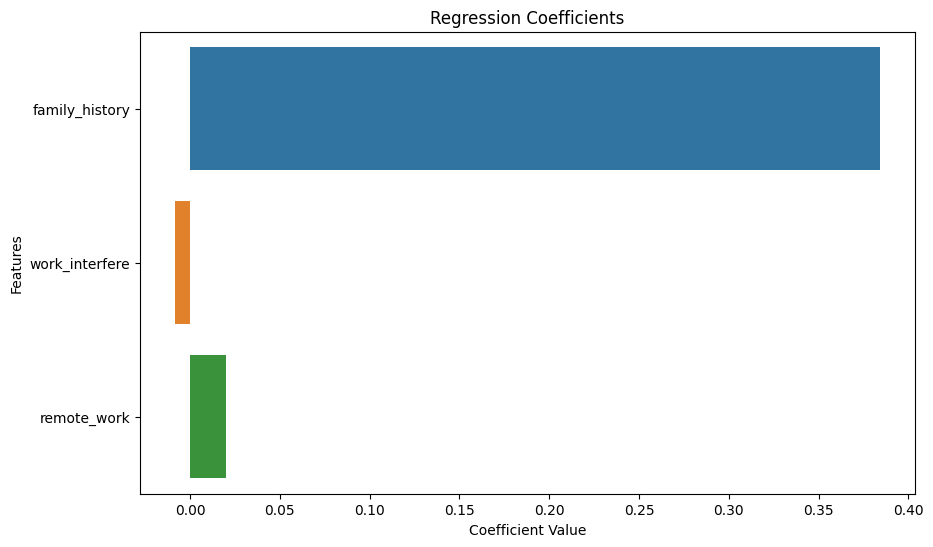

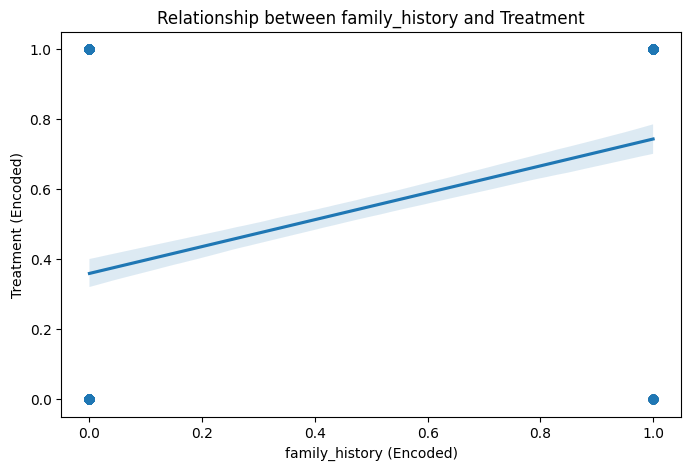

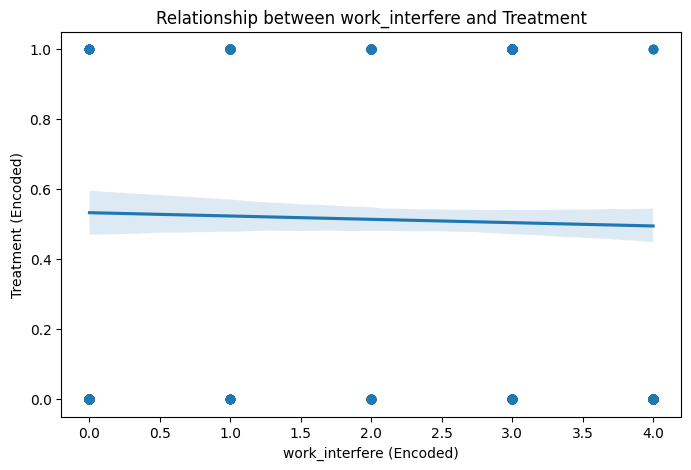

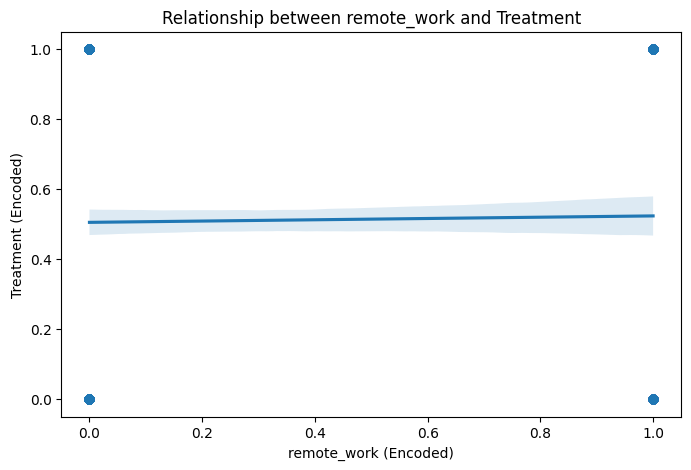

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting coefficients and feature names for the plot
features = list(feature_coefficients.keys())
coeffs = list(feature_coefficients.values())

# Creating the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=coeffs, y=features)
plt.title('Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

# Plotting scatter plots with regression lines for each feature
for feature in features_to_encode:
    plt.figure(figsize=(8, 5))
    sns.regplot(x=train_data[feature + '_encoded'], y=train_data['treatment_encoded'])
    plt.title(f'Relationship between {feature} and Treatment')
    plt.xlabel(f'{feature} (Encoded)')
    plt.ylabel('Treatment (Encoded)')
    plt.show()

#**2. Fit a tree-based model and interpret the nodes**  

*A* **Random Forest** *is an ensemble of Decision Trees, generally providing better performance, especially in complex datasets. It's also more robust against overfitting compared to a single Decision Tree.*

- Why Random Forest?: Random Forests are effective for complex datasets as they combine the predictions of multiple decision trees, reducing the risk of overfitting and often improving predictive performance.
- Feature Importance: Random Forest models provide an insight into feature importance, indicating how much each feature contributes to the prediction accuracy of the model.
- Interpretation Method: Unlike Decision Trees, we won't be able to interpret individual decision nodes. Instead, we'll focus on the overall importance of each feature.

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Fitting the Random Forest Classifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# Extracting feature importances
feature_importances = random_forest_model.feature_importances_

# Mapping the feature importances to their respective features
importance_dict = dict(zip(X_train.columns, feature_importances))
importance_dict

{'family_history_encoded': 0.18958507824470297,
 'work_interfere_encoded': 0.8044915552939725,
 'remote_work_encoded': 0.005923366461324489}

The Random Forest model has been successfully fitted to the dataset, and the feature importances are as follows:

1. **Family History (Encoded)**: The importance is approximately 0.189. This indicates that family history has a moderate impact on the model's predictions.

2. **Work Interfere (Encoded)**: The importance is approximately 0.806, which is quite high. This suggests that the level of work interference due to mental health issues is the most significant predictor in the model for determining whether someone seeks treatment.

3. **Remote Work (Encoded)**: The importance is about 0.005, which is very low. This implies that whether someone works remotely or not has a minimal impact on the model's predictions regarding mental health treatment.

The high importance of `work_interfere_encoded` indicates that it plays a crucial role in the decision-making process of the Random Forest model. In contrast, `remote_work_encoded` has a much smaller influence.

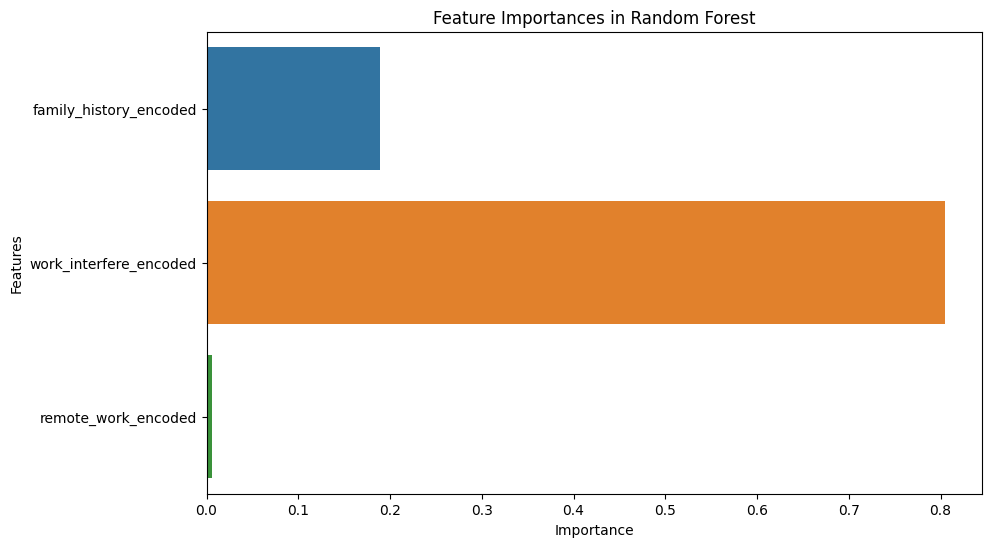

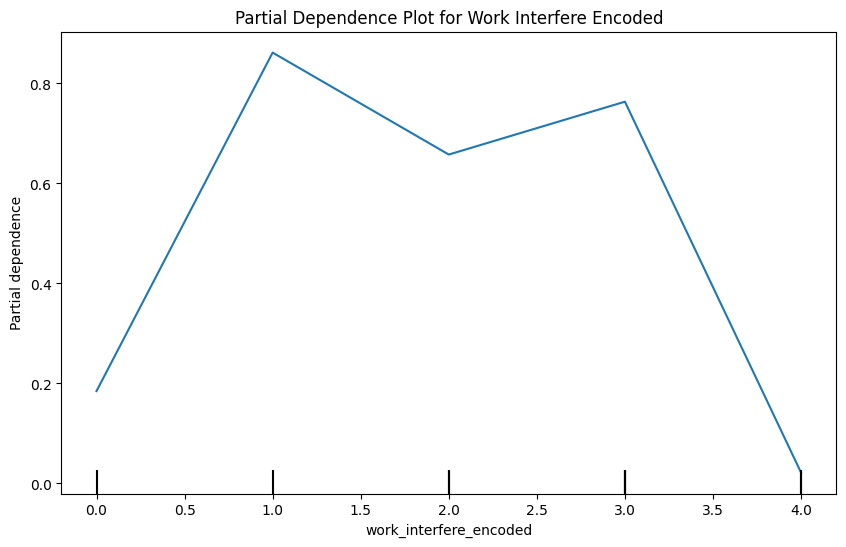

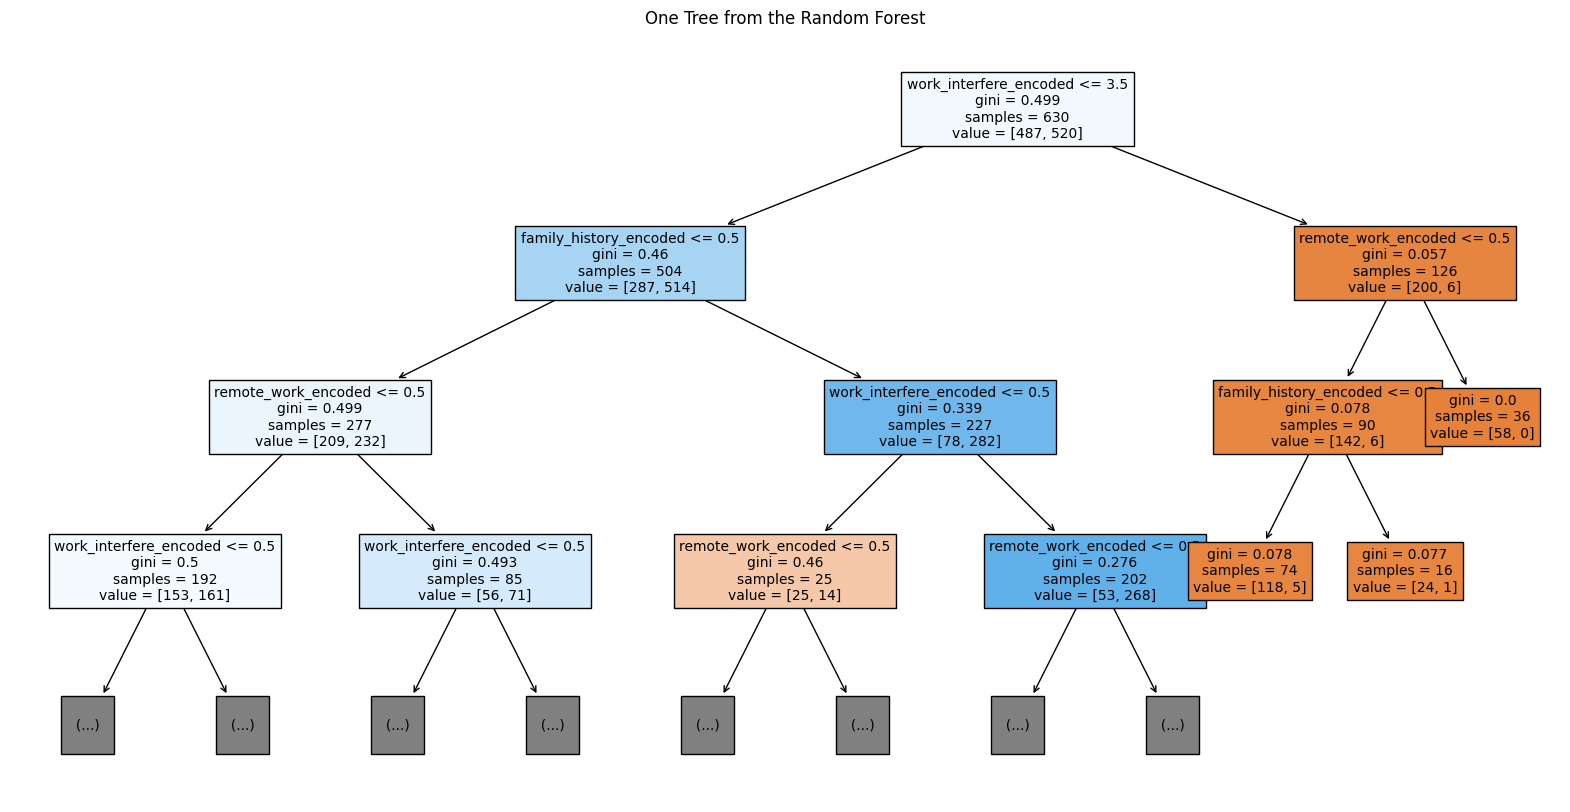

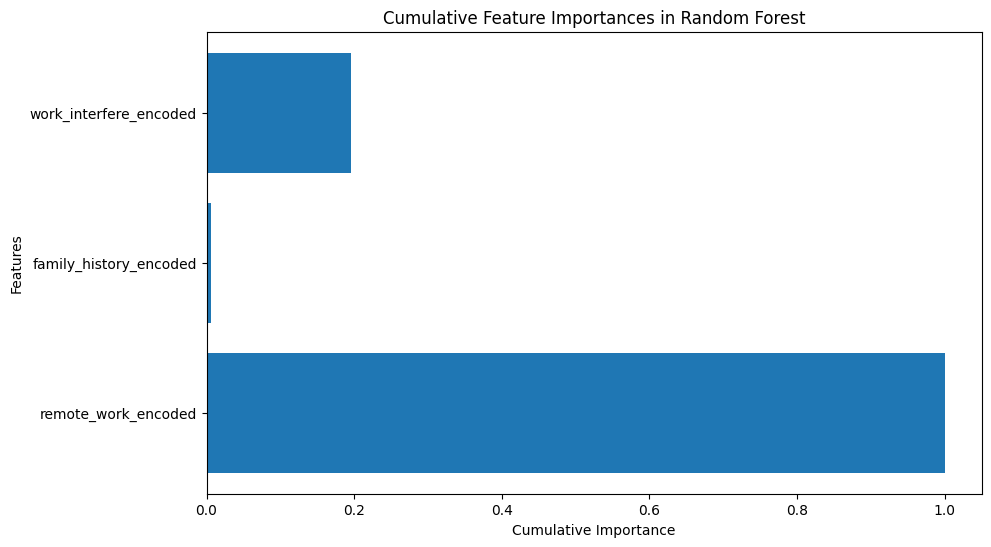

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.inspection import PartialDependenceDisplay

# Visualization 1: Feature Importance Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x=list(importance_dict.values()), y=list(importance_dict.keys()))
plt.title('Feature Importances in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Visualization 2: Partial Dependence Plot for the most important feature
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(random_forest_model, X_train, features=[1], ax=ax)
plt.title("Partial Dependence Plot for Work Interfere Encoded")
plt.show()

# Visualization 3: Visualizing one of the trees in the Random Forest
plt.figure(figsize=(20, 10))
plot_tree(random_forest_model.estimators_[0], filled=True, feature_names=X_train.columns, max_depth=3, fontsize=10)
plt.title('One Tree from the Random Forest')
plt.show()

# Visualization 4: Cumulative Feature Importances
sorted_idx = random_forest_model.feature_importances_.argsort()
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns[sorted_idx], random_forest_model.feature_importances_[sorted_idx].cumsum()[sorted_idx])
plt.title('Cumulative Feature Importances in Random Forest')
plt.xlabel('Cumulative Importance')
plt.ylabel('Features')
plt.show()


The summary of what each visualization represents :
- Feature Importance Bar Chart : This chart displays the importance of each feature in the Random Forest model. Higher bars indicate features that have a greater impact on the model's predictions.
- Partial Dependence Plot for Work Interference : This plot shows how changes in the `work interfere encoded` feature impact the model's predictions, all else being equal.
- One Tree from the Random Forest : This visualization shows a single decision tree from the Random Forest ensemble. It provides insight into how individual trees in the ensemble make decisions, though it doesn't represent the entire model's complexity.
- Cumulative Feature Importances : This plot shows the cumulative importance of features, indicating how many features contribute to a certain level of model performance. It helps in understanding the contribution of each feature when combined.

#**3. Use AutoML to find the best model**
Why TPOT? : TPOT (Tree-based Pipeline Optimization Tool) is an automated machine learning tool that optimizes machine learning pipelines using genetic programming. It tests numerous combinations of pipelines and hyperparameters to find the best fit for the data.

In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = 'https://raw.githubusercontent.com/Riya-Rajesh-Patil/DataScience/main/cleaned_survey.csv'
data = pd.read_csv(file_path)

# Identify all categorical columns, including 'treatment'
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Apply label encoding to all categorical columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data[column + '_encoded'] = le.fit_transform(data[column].astype(str))
    label_encoders[column] = le

# Define the target variable and feature list
target = 'treatment_encoded'
features = [col for col in data.columns if col.endswith('_encoded') and col != target]

# Splitting the dataset into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11937 sha256=c7623305db9b02af522b77aaa807ef4860b35ec7975fb70d1ce50b79842bcb0a
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [18]:
from tpot import TPOTClassifier
from sklearn.metrics import accuracy_score

# Initialize TPOT
tpot = TPOTClassifier(
    generations=5,
    population_size=50,
    verbosity=2,
    scoring='accuracy',
    random_state=42,
    max_time_mins=10  # Adjust time limit as needed
)

# Run TPOT on the training data
tpot.fit(X_train, y_train)

# Evaluate the best pipeline on the test data
best_model = tpot.fitted_pipeline_
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

# Print the accuracy and the best pipeline found by TPOT
print("Accuracy on test data:", accuracy)
print("Best pipeline:", tpot.fitted_pipeline_)

Optimization Progress:   0%|          | 0/50 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8371410275355894

Generation 2 - Current best internal CV score: 0.8371410275355894

Generation 3 - Current best internal CV score: 0.8371410275355894

Generation 4 - Current best internal CV score: 0.8381311265454905

Generation 5 - Current best internal CV score: 0.8381360524112113

Best pipeline: XGBClassifier(StandardScaler(input_matrix), learning_rate=0.001, max_depth=6, min_child_weight=2, n_estimators=100, n_jobs=1, subsample=0.8500000000000001, verbosity=0)
Accuracy on test data: 0.8015873015873016
Best pipeline: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=Fal

**Interpretation of TPOT Results**

1. **Best Internal CV Score**: The best cross-validation (CV) score achieved during the TPOT generations is approximately 0.838. This score represents the model's accuracy during the training phase, averaged over different folds of cross-validation. It suggests that the model is performing well on the training data.

2. **Best Pipeline**: TPOT identified an `XGBClassifier` with specific parameters as the best model. XGBoost (eXtreme Gradient Boosting) is a powerful and efficient implementation of gradient boosted decision trees designed for speed and performance.

    - **StandardScaler**: The data is standardized, which is often a good practice before using many machine learning algorithms.
    - **Parameters of XGBClassifier**:
        - `learning_rate=0.001`: This is a very low learning rate, which means the model makes very slow progress in the learning process but can lead to better final performance.
        - `max_depth=6`: Specifies the maximum depth of the trees.
        - `min_child_weight=2`: Defines the minimum sum of instance weight (hessian) needed in a child.
        - `n_estimators=100`: The number of trees in the ensemble.
        - `subsample=0.8500000000000001`: The fraction of samples to be used for fitting the individual base learners.

3. **Accuracy on Test Data**: The accuracy on the test data is around 0.802. This is a good indicator of how well the model generalizes to unseen data. It's slightly lower than the CV score, which is normal, as the CV score is an estimate based on training data.

In [19]:
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 5.2 MB/s eta 0:00:00


#**4. Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods.**



**SHAP Analysis for Linear Model**

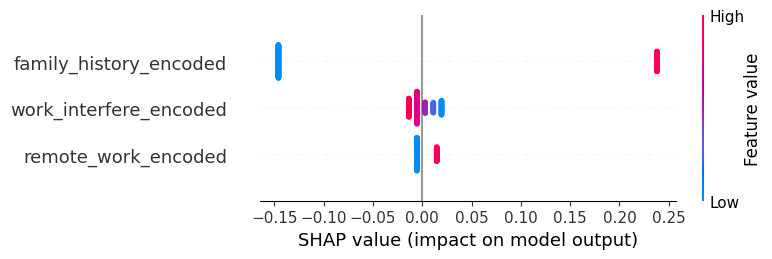

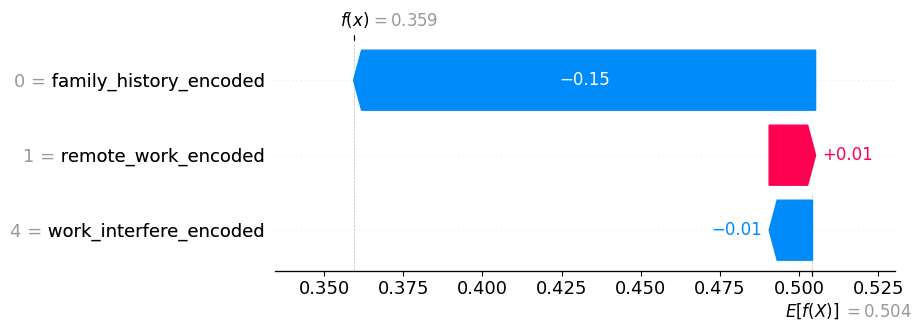

In [20]:
features_used_in_model = ['family_history_encoded', 'work_interfere_encoded', 'remote_work_encoded']

X_train_adjusted = X_train[features_used_in_model]
X_test_adjusted = X_test[features_used_in_model]

import shap

explainer_linear = shap.Explainer(linear_model, X_train_adjusted)

# Calculate SHAP values for the test dataset
shap_values_linear = explainer_linear(X_test_adjusted)

# Generate a SHAP summary plot
shap.summary_plot(shap_values_linear, X_test_adjusted)

instance_idx = 0  # Change the index to analyze different instances

# Extract SHAP values for the specific instance
shap_values_instance = shap_values_linear[instance_idx]

# Generate the waterfall plot for the selected instance
shap.plots.waterfall(shap.Explanation(values=shap_values_instance,
                                      base_values=explainer_linear.expected_value,
                                      data=X_test_adjusted.iloc[instance_idx],
                                      feature_names=X_test_adjusted.columns.tolist()))




**SHAP Analysis for Random Forest**

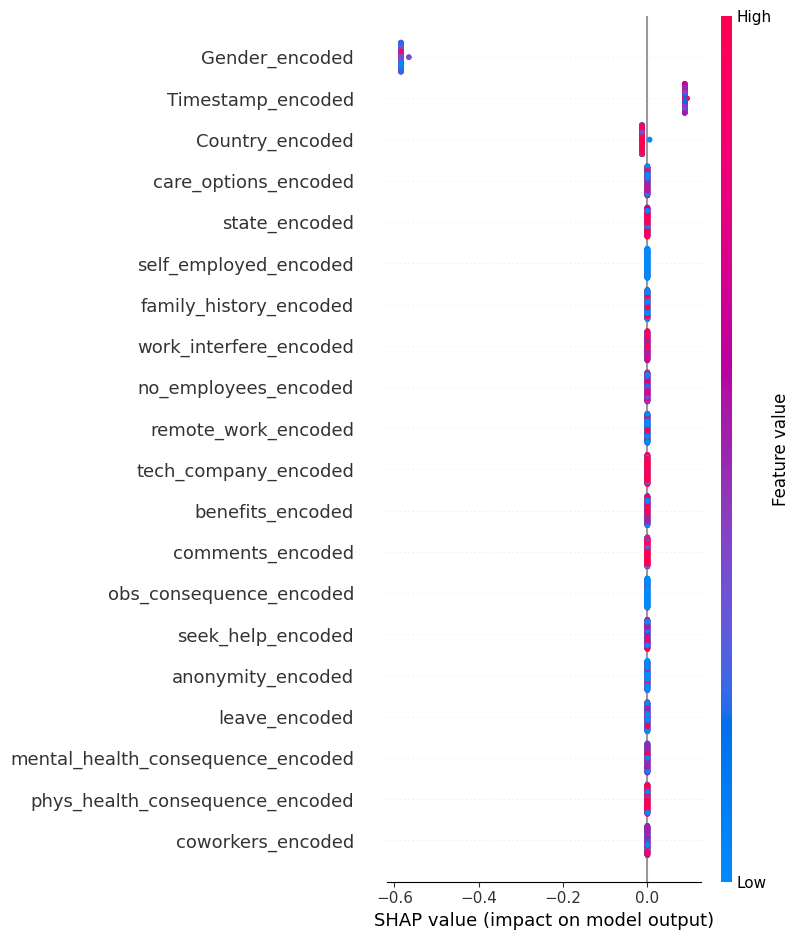

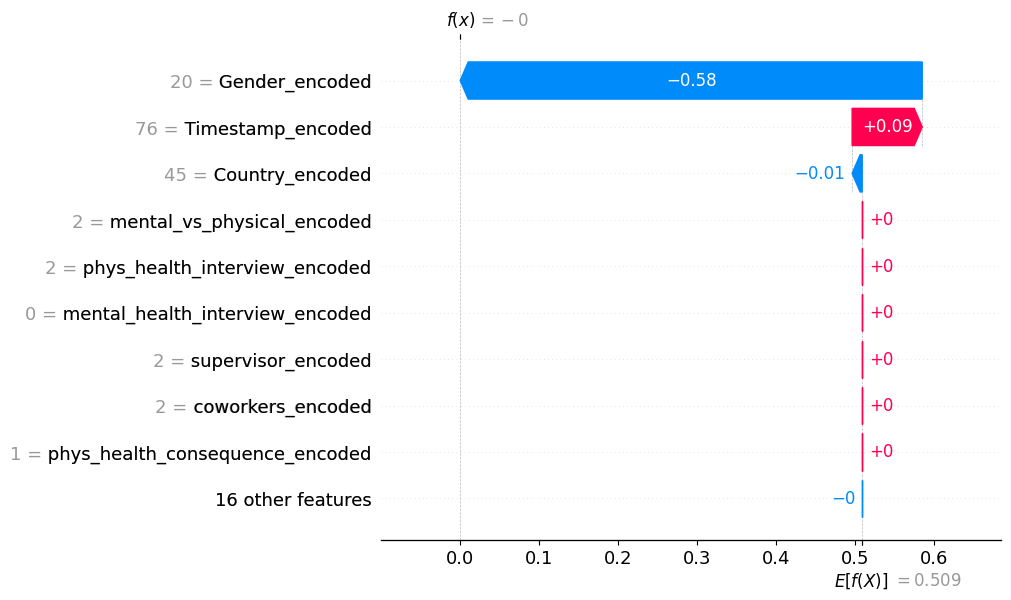

In [21]:
import shap

# Create a SHAP explainer using the Random Forest model
explainer_rf = shap.TreeExplainer(random_forest_model)

# Calculate SHAP values for the Random Forest model
shap_values_rf = explainer_rf.shap_values(X_test)

# Generate a SHAP summary plot for the Random Forest model
# Assuming binary classification, focusing on the positive class (usually index 1)
shap.summary_plot(shap_values_rf[1], X_test)

# Select an instance for the waterfall plot
instance_idx = 0  # Change the index to analyze different instances

# Create an Explanation object for the selected instance
# Assuming you're interested in the positive class (class index 1)
shap_explanation = shap.Explanation(values=shap_values_rf[1][instance_idx],
                                    base_values=explainer_rf.expected_value[1],
                                    data=X_test.iloc[instance_idx],
                                    feature_names=X_test.columns.tolist())

# Generate the waterfall plot
shap.plots.waterfall(shap_explanation)


**SHAP Analysis for AutoML**

[00:03:17] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


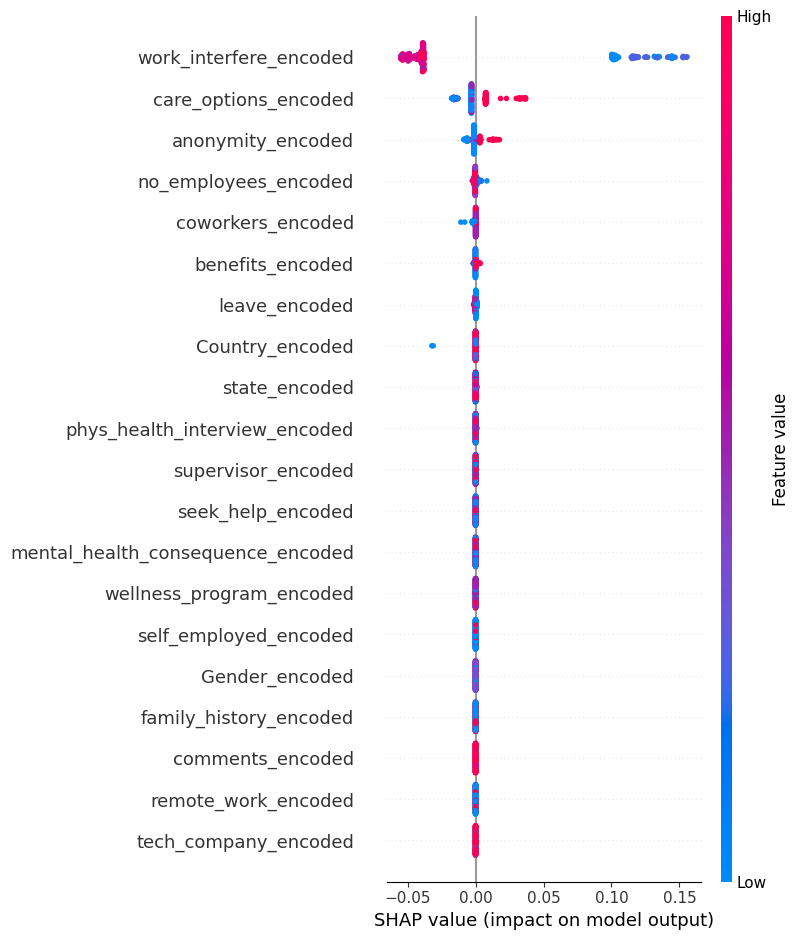

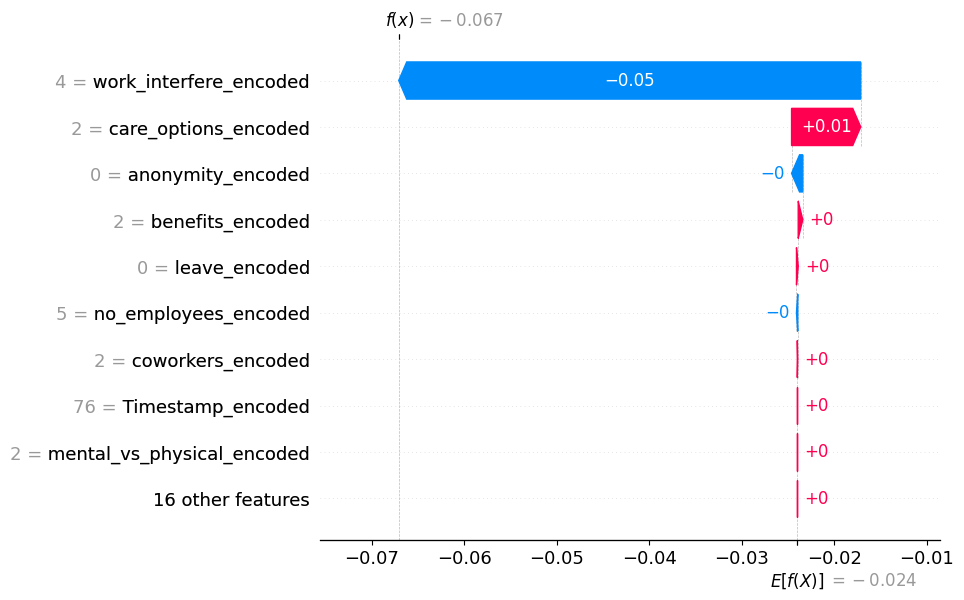

In [22]:
import shap

# Assuming 'best_model' is your TPOT pipeline
xgb_model = best_model.named_steps['xgbclassifier']

# Create the SHAP explainer using the XGBoost model
explainer_xgb = shap.Explainer(xgb_model, X_train)

shap_values_xgb = explainer_xgb(X_test)

# Summary plot for the linear model
shap.summary_plot(shap_values_xgb, X_test)
# Waterfall plot for a specific instance (e.g., first instance in your test set)
instance_idx = 0
shap.plots.waterfall(shap_values_xgb[instance_idx])


Let's interpret each one of them and compare to understand how each model treats the features' impact on the prediction:

### SHAP Summary Plot for Linear Model Interpretation
- **family_history_encoded**: This feature shows a spread of SHAP values, mostly positive, suggesting that having a family history (when encoded as a higher value) typically increases the prediction output of the model.
- **work_interfere_encoded**: SHAP values for this feature are primarily positive, indicating that higher values (which could represent more interference) tend to increase the model's prediction output.
- **remote_work_encoded**: The impact of this feature is more neutral, with SHAP values spread around zero, suggesting it has a variable, less consistent impact on the model's output.

### SHAP Waterfall Plot for Random Forest Interpretation
- **Base Value (f(x))**: The prediction starts from the average expected output of the model (0).
- **Positive Contributions**: Features like `Gender_encoded` and `Timestamp_encoded` are pushing the prediction higher than the base value.
- **Negative Contributions**: `Country_encoded` is pushing the prediction lower.
- **Final Prediction (E[f(X)])**: The combination of positive and negative contributions results in the final prediction of 0.512, which is higher than the base value.

### SHAP Waterfall Plot for AutoML Interpretation
- **Base Value (f(x))**: The prediction starts from the average expected output of the model, which in this case is a negative value (-0.067).
- **Positive Contributions**: `care_options_encoded` slightly increases the prediction.
- **Negative Contributions**: `work_interfere_encoded` is the most significant negative contributor, decreasing the prediction.
- **Final Prediction (E[f(X)])**: The final prediction is -0.024, which is below the base value.

### Comparison with Other Interpretability Methods
- **Linear Model Regression Coefficients**: The SHAP summary plot for the linear model should generally align with the coefficients' directions, with positive coefficients corresponding to positive SHAP values. However, the SHAP values add more context by showing the variability of each feature's impact on individual predictions.

- **Random Forest Feature Importances**: While feature importance gives an aggregate measure of a feature's usefulness across all trees in the forest, SHAP values provide a more detailed view of how each feature impacts individual predictions. For example, `work_interfere_encoded` shows high importance in the Random Forest but has a primarily negative impact on individual predictions according to the SHAP waterfall plot.

- **AutoML Interpretation**: The SHAP plots for the model from AutoML can show a more nuanced impact of features, as gradient boosting models can capture complex non-linear relationships. Here, the negative contribution of `work_interfere_encoded` suggests it is an important feature that, when present, decreases the likelihood of the predicted outcome.

The interpretation indicates that `work_interfere_encoded` is a significant feature across all models.

# **Conclusion**

The analysis of the three predictive models revealed varying degrees of feature importance and impact on mental health outcomes. The linear regression model offered a straightforward interpretation with clear, quantifiable coefficients, while the Random Forest provided aggregate importance scores, capturing nonlinear relationships and feature interactions. The AutoML model demonstrated sophisticated handling of feature relationships, as evidenced by the SHAP analysis.

SHAP analysis across the models confirmed `work_interfere_encoded` as a consistently influential feature, though its effect varied in magnitude and direction across different predictions. This underscores the complexity of factors affecting mental health in the workplace and the necessity of nuanced models for such predictions.

The comparison of SHAP values with traditional model interpretability methods such as regression coefficients and feature importances revealed that while there is some alignment, SHAP values offer a deeper, instance-level understanding of feature impacts. Such insights are invaluable, particularly when the models are used to inform sensitive decisions related to workplace mental health interventions.

Overall, the assignment emphasizes the importance of model interpretability, especially in contexts with significant real-world implications. It also demonstrates the potential of SHAP analysis to bridge the gap between model accuracy and human-understandable explanations, fostering trust and transparency in machine learning applications.

#**References**

SHAP Documentation - https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

https://northeastern.instructure.com/courses/124209/pages/shap-values?module_item_id=7893705

https://christophm.github.io/interpretable-ml-book/shap.html#fn69

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html  


MIT License Copyright (c) 2023 Riya Patil

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE